# A X Scripts Summary of Matplotlib Introductory Documentation
## A compressed guide for basic data visualization

Matplotlib is amazing, it's flexible, fast and it's the bread and butter of data visualization in Python. To get the most out of it, one needs to understand
a few basic concepts from it's underlying architecture to be able to customize plots to whatever is needed. 

___In this article I will show you X scripts that summarize the basics of Matplotlib in a condensed and practical way ___

- __Figures and Axes__

Matplotlib graphs your data on Figures (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more Axes (i.e., an area where points can be specified in terms of x-y coordinates, or theta-r in a polar plot, or x-y-z in a 3D plot, etc.). The simplest way of creating a figure with an axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the axes:

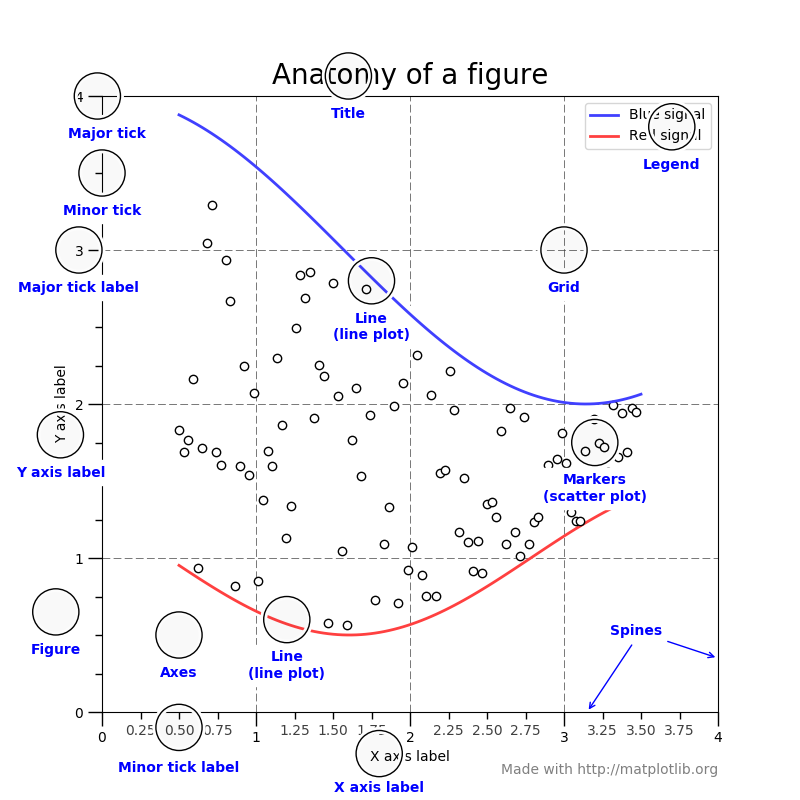

## Plotting Basics: anatomy of a matplotlib figure

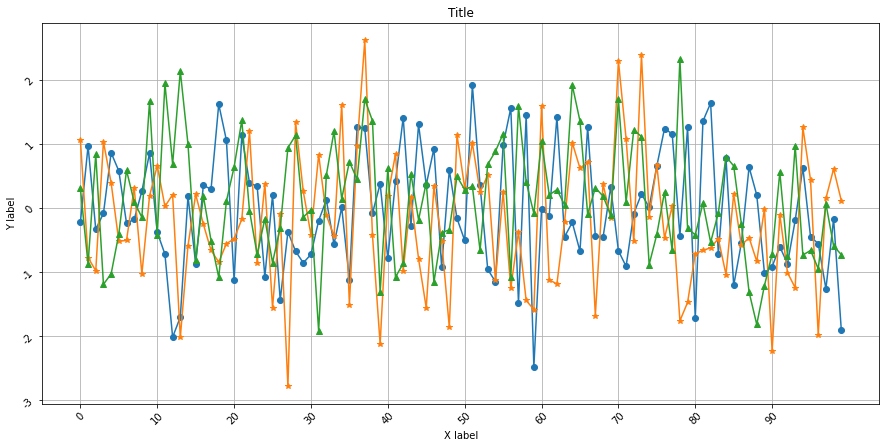

In [57]:
fig,axs = plt.subplots(figsize=(15,7)) 
data1 = np.random.normal(0,1,100)
data2 = np.random.normal(0,1,100)
data3 = np.random.normal(0,1,100)
x_ax = np.arange(0,100,10)
y_ax = np.arange(-3,3,1)
axs.plot(data1,marker="o")
axs.plot(data2,marker="*")
axs.plot(data3,marker="^")
axs.set_xticks(x_ax)
axs.set_xticklabels(labels=x_ax,rotation=45)
axs.set_yticks(y_ax)
axs.set_yticklabels(labels=y_ax,rotation=45)
axs.set_xlabel("X label")
axs.set_ylabel("Y label")
axs.set_title("Title")
axs.grid("on")

## The object-oriented interface and the pyplot interface

As noted in the [documentation](https://matplotlib.org/stable/users/index.html), there are essentially two ways to use Matplotlib:

- Create figures and axesExplicitly, and call methods on them (the
  "object-oriented (OO) style").
- Rely on the pyplot module to automatically create and manage the figures and axes, and
  use pyplot functions for plotting.

OO style

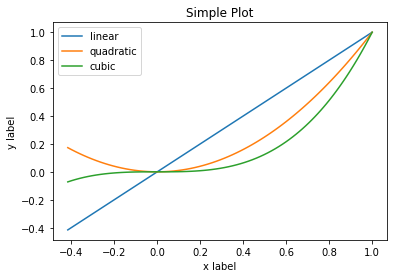

In [4]:
import matplotlib.pyplot as plt
import numpy as np


x = np.cos(np.linspace(0, 2, 100)) # Create the data
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes with pyplot.subplots()
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

Pyplot style

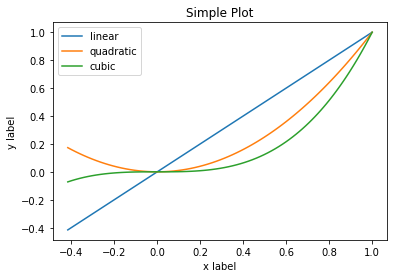

In [6]:
x = np.cos(np.linspace(0, 2, 100)) # Create the data
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # same pipeline but using pyplot.plot directly
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

- When to use OO versus pyplot

Matplotlib's documentation and examples use both approaches but they highlight that
it is preferable pick one of them and stick to it, instead of mixing them. 

The suggestion they give is to ___restrict pyplot to interactive
plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for
non-interactive plotting___ (in functions and scripts that are intended to be
reused as part of a larger project).

### Recommended function signature for matplotlib plots

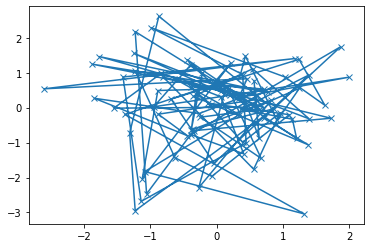

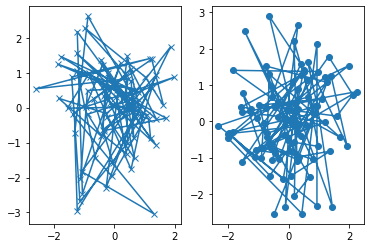

In [7]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out


data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})


# 2 sub-plots example
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

### Formatting the style of your plot

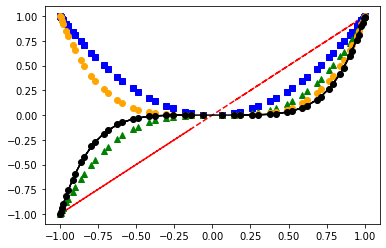

In [20]:
import numpy as np

t = np.sin(np.linspace(-3,3,50))
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', color="red")
plt.plot(t, t**2, 'bs', color="blue")
plt.plot(t, t**3, 'g^', color="green")
plt.plot(t, t**4, "o", color="orange")
plt.plot(t, t**5, "o-", color="black")
plt.show()

See more on 
- [Customizing style sheets in matplotlib](https://matplotlib.org/stable/tutorials/introductory/customizing.html)
- [pyplot.setp documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.setp.html)
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html#:~:text=Here%20are,Line2D%20properties.

## Plotting with keyword strings (from dictionaries)

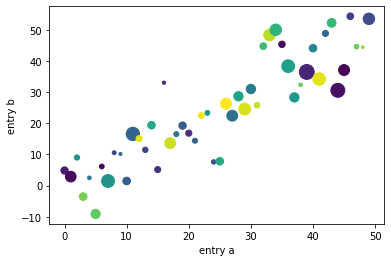

In [8]:
# source: https://matplotlib.org/stable/gallery/misc/keyword_plotting.html
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## Plotting categorical variables

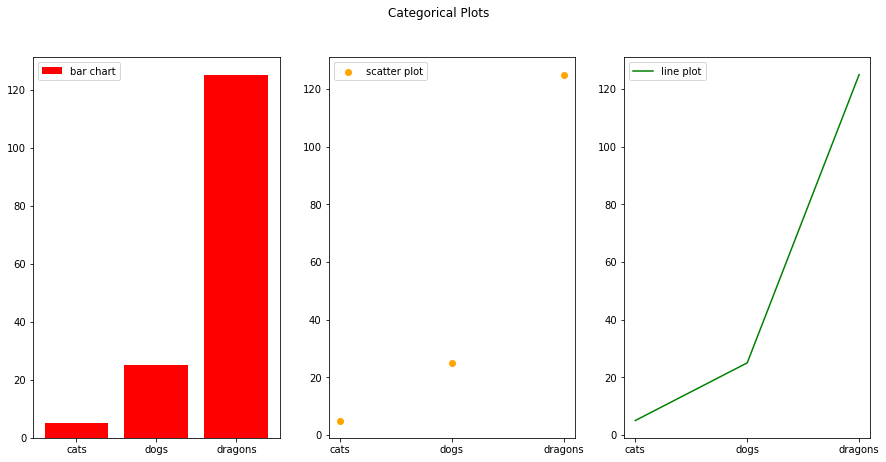

In [22]:
names = ['cats', 'dogs', 'dragons']
values = [5, 25, 125]
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.bar(names, values, color="red", label="bar chart")
plt.legend()
plt.subplot(132)
plt.scatter(names, values, color="orange", label="scatter plot")
plt.legend()
plt.subplot(133)
plt.plot(names, values, color="green", label="line plot")
plt.legend()
plt.suptitle('Categorical Plots')
plt.show()

## Working with multiple figures 

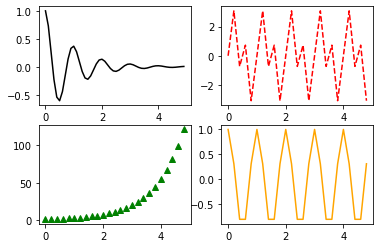

In [47]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.2)

plt.figure()

plt.subplot(2,2,1)
plt.plot(t1, f(t1), 'black')

plt.subplot(2,2,2)
plt.plot(t2, np.tan(2*np.pi*t2), 'r--')

plt.subplot(2,2,3)
plt.plot(t2, np.exp(t2), 'g^')

plt.subplot(2,2,4)
plt.plot(t2, np.cos(2*np.pi*t2), 'orange');

You can use figure numbers to create multiple figures. 

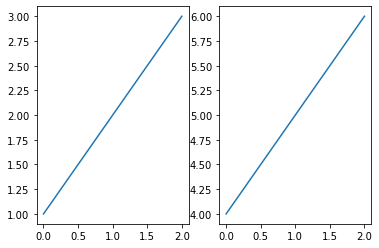

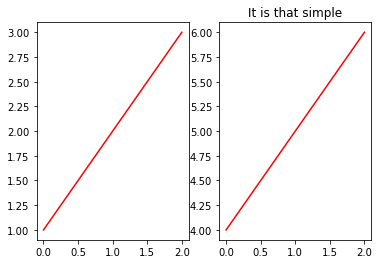

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1)                
plt.subplot(121)             
plt.plot([1, 2, 3])
plt.subplot(122)             
plt.plot([4, 5, 6])

plt.figure(2)
plt.subplot(121)
plt.plot([1, 2, 3],color="red")
plt.subplot(122)
plt.plot([4, 5, 6],color="red")
plt.title('It is that simple'); 

See more on:
- [Working with multiple figures](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/multiple_figs_demo.html)


## Working with Text

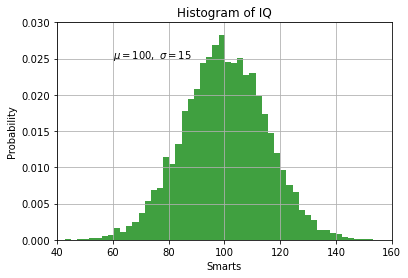

In [62]:
# source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

All of the text functions return a matplotlib.text.Text instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:

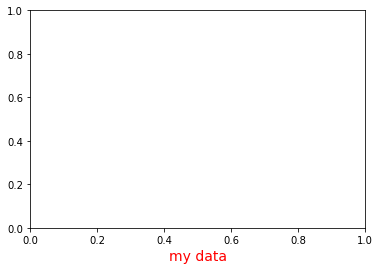

In [63]:
t = plt.xlabel('my data', fontsize=14, color='red')

- Using math expressions in text

Text(0.5, 1.0, '$\\sigma_i=15$')

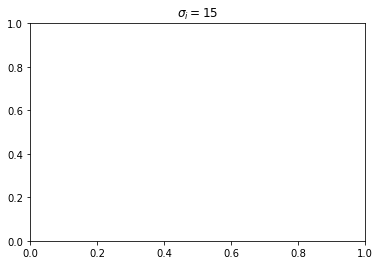

In [64]:
plt.title(r'$\sigma_i=15$')

more at:
- https://matplotlib.org/stable/tutorials/text/text_props.html

The r preceding the title string is important -- it signifies that the string is a raw string and not to treat backslashes as python escapes. matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts -- for details see Writing mathematical expressions. Thus you can use mathematical text across platforms without requiring a TeX installation. For those who have LaTeX and dvipng installed, you can also use LaTeX to format your text and incorporate the output directly into your display figures or saved postscript -- see Text rendering With LaTeX.

- Annotations

In [65]:
hover_text = """
The uses of the basic text function above place text at an arbitrary position
on the Axes. A common use for text is to annotate some feature of the plot,
and the annotate method provides helper functionality to make annotations
easy. In an annotation, there are two points to consider: the location being
annotated represented by the argument xy and the location of the text xytext.
Both of these arguments are (x, y) tuples.
"""

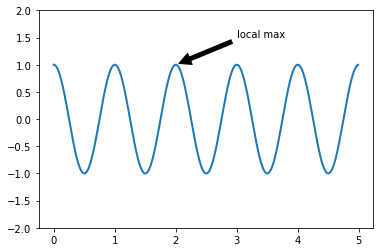

In [66]:
# source: https://matplotlib.org/stable/tutorials/text/annotations.html
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

See more at:
- [Working with annoattions](https://matplotlib.org/stable/tutorials/text/annotations.html)

## Working with other axis scales

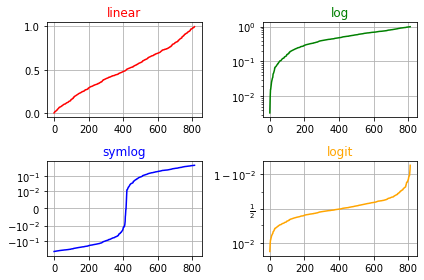

In [54]:
# adapted from: https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y, color="red")
plt.yscale('linear')
plt.title('linear',color="red")
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y, color="green")
plt.yscale('log')
plt.title('log',color="green")
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean(),color="blue")
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog',color="blue")
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y, color="orange")
plt.yscale('logit')
plt.title('logit',color="orange")
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.tight_layout()
plt.show()

See more on:
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py